# DataScience project involving data-cleaning, model building using regression model and custom predictions using StreamLit

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("fish.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [4]:
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


# Data Analysis


### Step1: Finding if there are any Null Values in our dataset.

In [5]:
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [6]:
df.isnull().sum().sum()

0

#### As we can see there are a total of 0 null values we don't have to clean it #### 

### Step2: Finding number of unique values in each column.

In [7]:
df['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

# Model Building

### Step1: Rearranging columns to get a dataset which has last column as weight.

In [8]:
columns1=list(df.columns)

In [9]:
columns1

['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']

In [10]:
columns2=['Species','Length1', 'Length2', 'Length3', 'Height', 'Width','Weight']

In [11]:
df=df[columns2]

In [12]:
df

,Species,Length1,Length2,Length3,Height,Width,Weight
0,Bream,23.2,25.4,30.0,11.5200,4.0200,242.0
1,Bream,24.0,26.3,31.2,12.4800,4.3056,290.0
2,Bream,23.9,26.5,31.1,12.3778,4.6961,340.0
3,Bream,26.3,29.0,33.5,12.7300,4.4555,363.0
4,Bream,26.5,29.0,34.0,12.4440,5.1340,430.0
...,...,...,...,...,...,...,...
154,Smelt,11.5,12.2,13.4,2.0904,1.3936,12.2
155,Smelt,11.7,12.4,13.5,2.4300,1.2690,13.4
156,Smelt,12.1,13.0,13.8,2.2770,1.2558,12.2
157,Smelt,13.2,14.3,15.2,2.8728,2.0672,19.7


# Model Building

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le=LabelEncoder()

In [15]:
df['Species']=le.fit_transform(df['Species'])

In [16]:
df

,Species,Length1,Length2,Length3,Height,Width,Weight
0,0,23.2,25.4,30.0,11.5200,4.0200,242.0
1,0,24.0,26.3,31.2,12.4800,4.3056,290.0
2,0,23.9,26.5,31.1,12.3778,4.6961,340.0
3,0,26.3,29.0,33.5,12.7300,4.4555,363.0
4,0,26.5,29.0,34.0,12.4440,5.1340,430.0
...,...,...,...,...,...,...,...
154,5,11.5,12.2,13.4,2.0904,1.3936,12.2
155,5,11.7,12.4,13.5,2.4300,1.2690,13.4
156,5,12.1,13.0,13.8,2.2770,1.2558,12.2
157,5,13.2,14.3,15.2,2.8728,2.0672,19.7


### Step2: Dividing the dataset into dependent and independent variables.

In [17]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x.values,y.values)

In [20]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [21]:
model.predict([[0,23.3,25.4,30,11,4.1]])

array([247.73110971])

# Graphical Representations

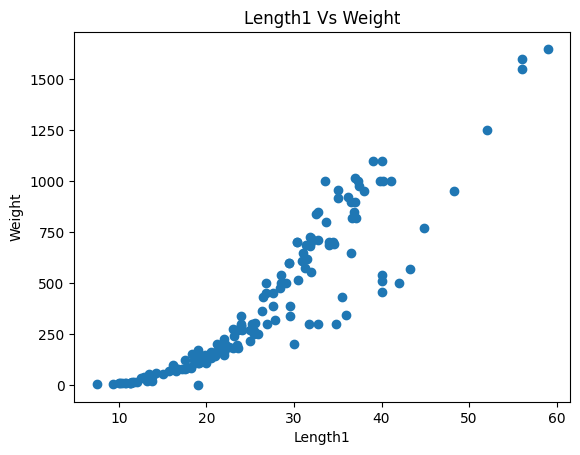

In [25]:
plt.scatter(df['Length1'],df['Weight'])
plt.xlabel("Length1")
plt.ylabel("Weight")
plt.title("Length1 Vs Weight")
plt.show()

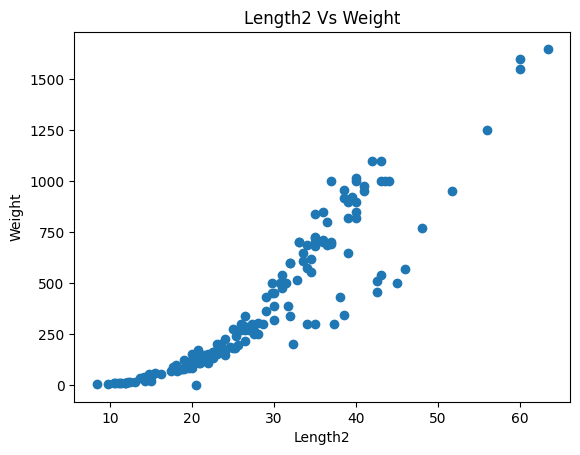

In [26]:
plt.scatter(df['Length2'],df['Weight'])
plt.xlabel("Length2")
plt.ylabel("Weight")
plt.title("Length2 Vs Weight")
plt.show()

AttributeError: 'Figure' object has no attribute 'plot'

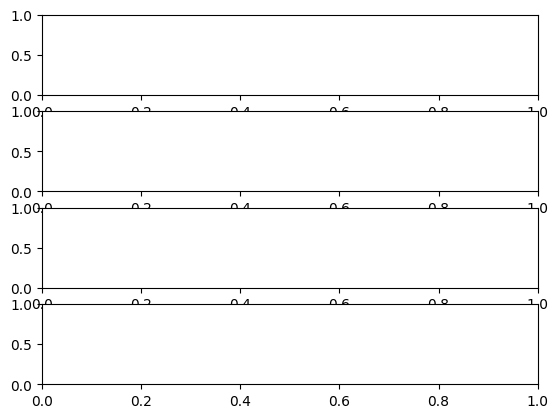